In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rc('legend',fontsize=14)

# Nz's cov

In [3]:
def make_sym(A):
    return np.maximum(A, A.transpose())

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [4]:
covs = np.load("../../data/DESY1/Nzs/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz")
s = sacc.Sacc().load_fits("../../data/DESY1/Nzs/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits")
z_DESwl__0_e = s.tracers["DESwl__0"].z
dndz_DESwl__0_e = (s.tracers["DESwl__0"].nz*np.mean(np.diff(s.tracers["DESwl__0"].z)))
z_DESwl__1_e = s.tracers["DESwl__1"].z
dndz_DESwl__1_e = (s.tracers["DESwl__1"].nz*np.mean(np.diff(s.tracers["DESwl__1"].z)))
z_DESwl__2_e = s.tracers["DESwl__2"].z
dndz_DESwl__2_e = (s.tracers["DESwl__2"].nz*np.mean(np.diff(s.tracers["DESwl__2"].z)))
z_DESwl__3_e = s.tracers["DESwl__3"].z
dndz_DESwl__3_e = (s.tracers["DESwl__3"].nz*np.mean(np.diff(s.tracers["DESwl__3"].z)))

nz_DESwl__0_e = (z_DESwl__0_e, dndz_DESwl__0_e)
nz_DESwl__1_e = (z_DESwl__1_e, dndz_DESwl__1_e)
nz_DESwl__2_e = (z_DESwl__2_e, dndz_DESwl__2_e)
nz_DESwl__3_e = (z_DESwl__3_e, dndz_DESwl__3_e)

In [5]:
nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100]), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200]),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300]),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400])}

/tmp/ipykernel_1259/95440055.py:7: RuntimeWarning: divide by zero encountered in log
  im = axis[i].imshow(np.log(abs(nzs_covs[cov])),


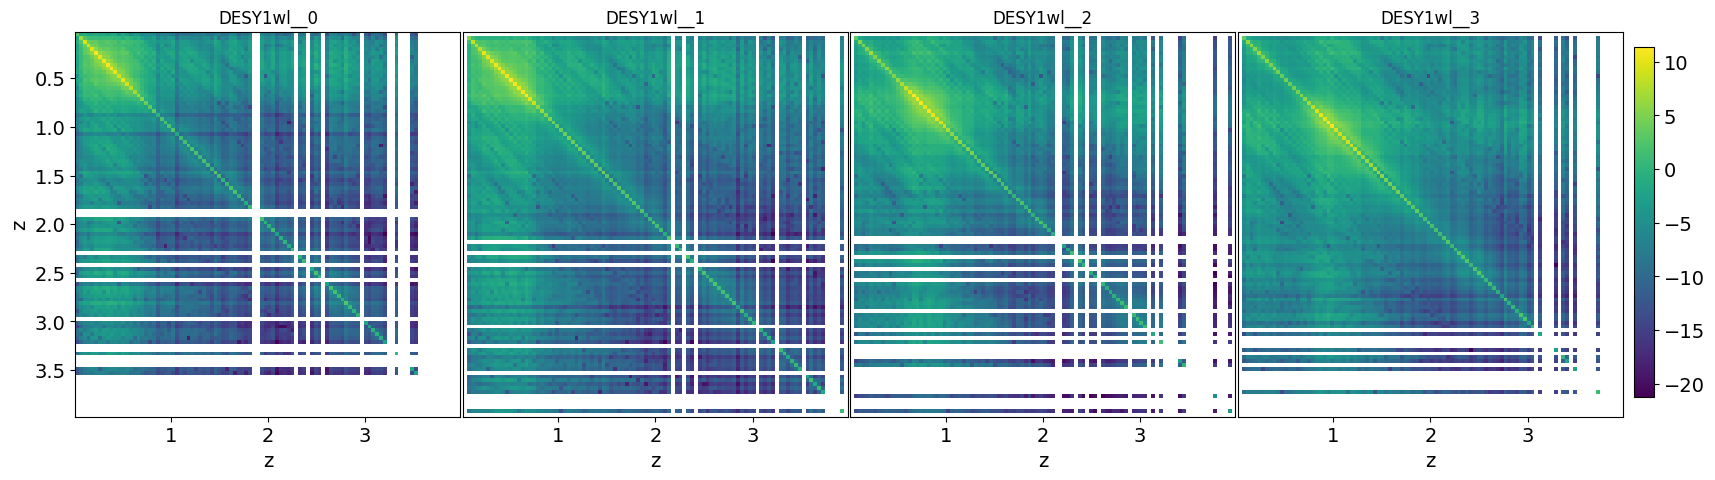

In [6]:
figure, axis = plt.subplots(1, 4, figsize=(20,5))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nz_DESwl__0_e[0]
    zmin, zmax = z[0], z[99]
    im = axis[i].imshow(np.log(abs(nzs_covs[cov])),
                        extent=[zmin, zmax, zmax, zmin])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

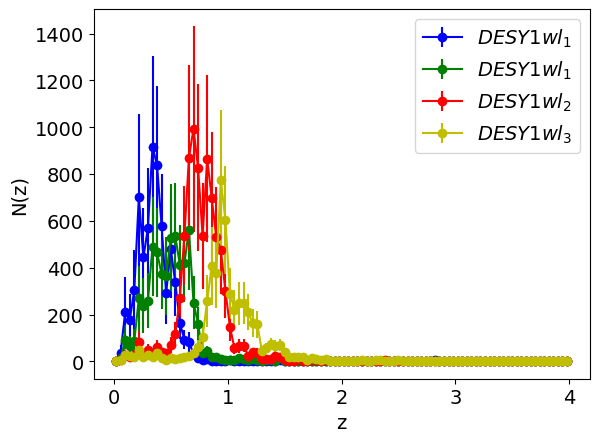

In [7]:
plt.errorbar(nz_DESwl__0_e[0], nz_DESwl__0_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__0"])),
             fmt='bo-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__1_e[0], nz_DESwl__1_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__1"])),
             fmt='go-', label="$DESY1wl_1$")

plt.errorbar(nz_DESwl__2_e[0],  nz_DESwl__2_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__2"])),
             fmt='ro-', label="$DESY1wl_2$")

plt.errorbar(nz_DESwl__3_e[0], nz_DESwl__3_e[1],
             yerr=np.sqrt(np.diag(nzs_covs["DESY1wl__3"])),
             fmt='yo-', label="$DESY1wl_3$")

plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)

In [8]:
np.savez("../../data/DESY1/Nzs/nz_DESwl__0_e.npz",
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])

np.savez("../../data/DESY1/Nzs/nz_DESwl__1_e.npz",
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../../data/DESY1/Nzs/nz_DESwl__2_e.npz",
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])

np.savez("../../data/DESY1/Nzs/nz_DESwl__3_e.npz",
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

## Binning

In [9]:
norm_0 = np.sum(dndz_DESwl__0_e)
norm_1 = np.sum(dndz_DESwl__1_e)
norm_2 = np.sum(dndz_DESwl__2_e)
norm_3 = np.sum(dndz_DESwl__3_e)

nz_DESwl__0_e = (z_DESwl__0_e[0:40], (dndz_DESwl__0_e/norm_0)[0:40])
nz_DESwl__1_e = (z_DESwl__1_e[1:41], (dndz_DESwl__1_e/norm_1)[1:41])
nz_DESwl__2_e = (z_DESwl__2_e[1:41], (dndz_DESwl__2_e/norm_2)[1:41])
nz_DESwl__3_e = (z_DESwl__3_e[1:41], (dndz_DESwl__3_e/norm_3)[1:41])

nzs_covs = {"DESY1wl__0": make_sym(covs['cov_nz'][:100][:, :100][:40][:,:40]/norm_0**2), 
            "DESY1wl__1": make_sym(covs['cov_nz'][100:200][:, 100:200][1:41][:,1:41]/norm_1**2),
            "DESY1wl__2": make_sym(covs['cov_nz'][200:300][:, 200:300][1:41][:,1:41]/norm_2**2),
            "DESY1wl__3": make_sym(covs['cov_nz'][300:400][:, 300:400][1:41][:,1:41]/norm_3**2)}

In [10]:
m = 40
#zs_k0_bins = np.mean(nz_DESwl__0_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k1_bins = np.mean(nz_DESwl__1_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k2_bins = np.mean(nz_DESwl__2_e[0][:m].reshape(m_bins, m // m_bins),1)
#zs_k3_bins = np.mean(nz_DESwl__3_e[0][:m].reshape(m_bins, m // m_bins),1)

#nz_k0_bins = np.mean(nz_DESwl__0_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k1_bins = np.mean(nz_DESwl__1_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k2_bins = np.mean(nz_DESwl__2_e[1][:m].reshape(m_bins, m // m_bins),1)
#nz_k3_bins = np.mean(nz_DESwl__3_e[1][:m].reshape(m_bins, m // m_bins),1)

#cov_k0_bins = (m_bins/m)*nzs_covs["DESY1wl__0"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k1_bins = (m_bins/m)*nzs_covs["DESY1wl__1"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k2_bins = (m_bins/m)*nzs_covs["DESY1wl__2"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)
#cov_k3_bins = (m_bins/m)*nzs_covs["DESY1wl__3"][:m][:,:m].reshape(m_bins, m // m_bins, m_bins, m // m_bins).mean(3).mean(1)

#corr_k0_bins = cov_k0_bins / np.outer(np.sqrt(np.diag(cov_k0_bins)), np.sqrt(np.diag(cov_k0_bins)))
#corr_k1_bins = cov_k1_bins / np.outer(np.sqrt(np.diag(cov_k1_bins)), np.sqrt(np.diag(cov_k1_bins)))
#corr_k2_bins = cov_k2_bins / np.outer(np.sqrt(np.diag(cov_k2_bins)), np.sqrt(np.diag(cov_k2_bins)))
#corr_k3_bins = cov_k3_bins / np.outer(np.sqrt(np.diag(cov_k3_bins)), np.sqrt(np.diag(cov_k3_bins)))


if os.path.isdir("../../data/DESY1/binned_{}_nzs".format(m))==False:
    os.mkdir("../../data/DESY1/binned_{}_nzs".format(m))

np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__0_e.npz".format(m),
         z=nz_DESwl__0_e[0], dndz=nz_DESwl__0_e[1], cov=nzs_covs["DESY1wl__0"])
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__1_e.npz".format(m),
         z=nz_DESwl__1_e[0], dndz=nz_DESwl__1_e[1], cov=nzs_covs["DESY1wl__1"])
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__2_e.npz".format(m),
         z=nz_DESwl__2_e[0], dndz=nz_DESwl__2_e[1], cov=nzs_covs["DESY1wl__2"])
np.savez("../../data/DESY1/binned_{}_nzs/nz_DESwl__3_e.npz".format(m),
         z=nz_DESwl__3_e[0], dndz=nz_DESwl__3_e[1], cov=nzs_covs["DESY1wl__3"])

## Plotting

In [11]:
nzs = {"DESY1wl__0": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__0_e.npz"), 
       "DESY1wl__1": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__1_e.npz"),
        "DESY1wl__2": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__2_e.npz"),
        "DESY1wl__3": np.load("../../data/DESY1/binned_40_nzs/nz_DESwl__3_e.npz")}

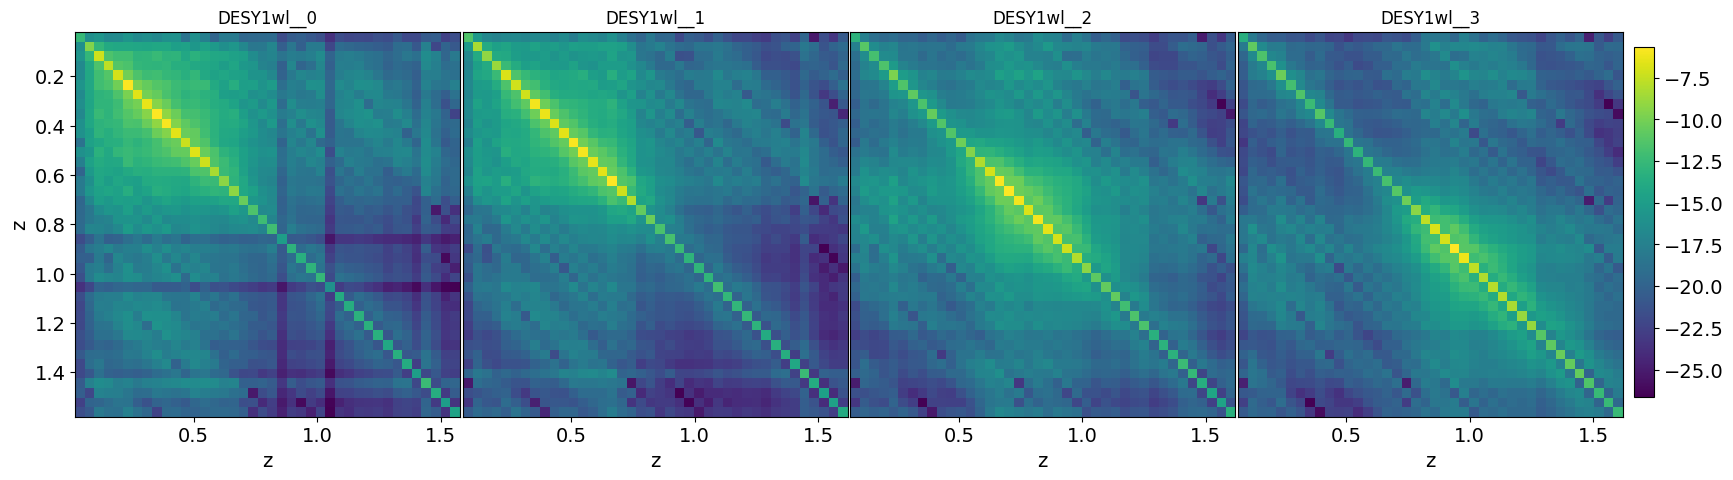

In [12]:
figure, axis = plt.subplots(1, 4, figsize=(20,5))
figure.subplots_adjust(wspace=0)
for i in range(0, len(nzs_covs.keys())):
    cov = list(nzs_covs.keys())[i]
    z = nzs[cov]["z"]
    im = axis[i].imshow(np.log(abs(nzs[cov]["cov"])), extent=[min(z), max(z), max(z), min(z)])
    axis[i].set_title(cov)
    if i > 0:
        axis[i].set_yticks([])
    else:
        axis[i].set_ylabel("z")
    axis[i].set_xlabel("z")
cbar_ax = figure.add_axes([0.905, 0.15, 0.01, 0.7])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)

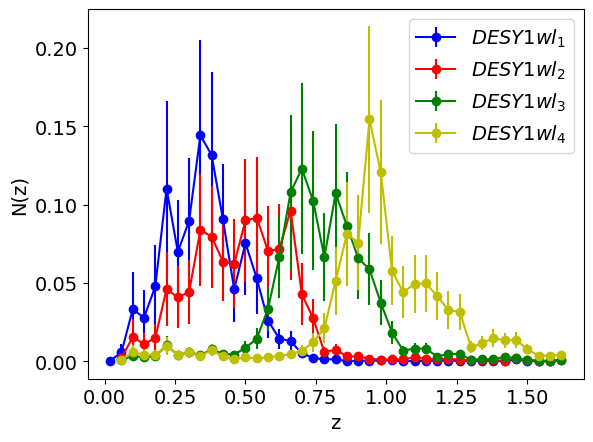

In [13]:
plt.errorbar(nzs["DESY1wl__0"]['z'], nzs["DESY1wl__0"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__0"]["cov"])), fmt='bo-', label="$DESY1wl_1$")
plt.errorbar(nzs["DESY1wl__1"]['z'], nzs["DESY1wl__1"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__1"]["cov"])), fmt='ro-', label="$DESY1wl_2$")
plt.errorbar(nzs["DESY1wl__2"]['z'], nzs["DESY1wl__2"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__2"]["cov"])), fmt='go-', label="$DESY1wl_3$")
plt.errorbar(nzs["DESY1wl__3"]['z'], nzs["DESY1wl__3"]['dndz'],
             yerr=np.sqrt(np.diag(nzs["DESY1wl__3"]["cov"])), fmt='yo-', label="$DESY1wl_4$")
plt.xlabel("z")
plt.ylabel("N(z)")
plt.legend();

plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/binned_covs.pdf', bbox_inches='tight',  pad_inches=0)